In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math  
from scipy import stats

In [13]:

df_raw = pd.read_csv("C:/Users/Fabrizio Ortega/AppData/Roaming/MetaQuotes/Terminal/Common/Files/EURUSD-PERIOD_M15.csv",sep=',',encoding='utf-16')
file_path="C:\\Users\\Fabrizio Ortega\\git\\MarketSystem\\MarketSystem\\resources\\data\\EURUSD-PERIOD_M15_m.csv"
#df_raw = pd.read_csv(file_path,sep=',',encoding='utf-16')

df = df_raw.iloc[:,8:]

In [14]:
df_raw.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Ask', 'Bid', 'atr',
       'Momentum10', 'Momentum50', 'Momentum200', 'Macd10_30', 'Macd50_100',
       'Macd100_200', 'Upper_band', 'Lower_band', 'Bulls_power', 'Bears_power',
       'RSI'],
      dtype='object')

In [15]:
print(len(df_raw))
#for col in df.columns:
   # df_raw[col] = df_raw[(np.abs(stats.zscore(df_raw[col])) < 4)]
print(len(df_raw))

247399
247399


In [16]:
df_raw=df_raw.fillna(method='bfill')

In [17]:
df.describe()

Momentum10     Momentum50    Momentum200      Macd10_30  \
count  247399.000000  247399.000000  247399.000000  247399.000000   
mean       -0.082711      -0.420806      -1.684489      -1.272028   
std        18.022375      40.190902      79.461869     112.108045   
min      -259.248083    -357.155443    -428.129550   -1368.250180   
25%        -7.395898     -20.633729     -47.111154     -50.332896   
50%         0.000000       0.077845      -0.759526       0.025877   
75%         7.289214      19.877801      45.619381      49.000241   
max       314.663787     369.184422     449.138510    1040.596831   

          Macd50_100    Macd100_200     Upper_band     Lower_band  \
count  247399.000000  247399.000000  247399.000000  247399.000000   
mean       -3.189626      -6.419083     197.913823     195.519723   
std       143.582583     201.545663     244.307965     242.227569   
min      -770.545070   -1068.698281   -1396.179652    -850.585338   
25%       -78.697155    -120.428541      54.786910      55.285782   
50%        -0.755269      -1.532386     126.212445     125.520230   
75%        76.948087     112.800884     256.239148     253.039290   
max       849.639576     893.493258    5338.215530    4531.220348   

         Bulls_power    Bears_power            RSI  
count  247399.000000  247399.000000  247399.000000  
mean       43.668670     -45.596816      49.891383  
std       147.491500     147.871989      10.039549  
min     -1602.127297   -2517.696041       9.998300  
25%       -22.163148     -99.189183      43.224739  
50%        29.014279     -29.248194      49.995115  
75%        96.981116      21.617347      56.604668  
max      3006.921051    1718.823972      90.863976

In [18]:
def normalize(arr, minimum=None, maximum=None, high=1.0, low=-1.0):
    _min = minimum if minimum else np.min(arr)
    _max = maximum if maximum else np.max(arr)
    return ((high-low) * ((arr - _min) / (_max - _min))) + low, _min, _max
def standarize(arr):
    return (arr-arr.mean())/arr.std()


In [19]:
for col in df.columns:
    print(col)
    df_raw[col] = standarize(df_raw[col])

Momentum10
Momentum50
Momentum200
Macd10_30
Macd50_100
Macd100_200
Upper_band
Lower_band
Bulls_power
Bears_power
RSI


In [20]:
df_raw.describe()

Open           High            Low          Close  \
count  247399.000000  247399.000000  247399.000000  247399.000000   
mean        1.230503       1.230951       1.230058       1.230502   
std         0.113280       0.113343       0.113215       0.113279   
min         1.034490       1.036250       1.032490       1.034490   
25%         1.123510       1.123880       1.123130       1.123510   
50%         1.229290       1.229740       1.228790       1.229290   
75%         1.332235       1.332780       1.331690       1.332240   
max         1.493150       1.493850       1.491810       1.493190   

                 Ask            Bid            atr    Momentum10  \
count  247399.000000  247399.000000  247399.000000  2.473990e+05   
mean        1.230584       1.230501       0.000896  2.786945e-17   
std         0.113291       0.113280       0.000424  1.000000e+00   
min         1.034560       1.034490       0.000157 -1.438020e+01   
25%         1.123590       1.123510       0.000590 -4.057837e-01   
50%         1.229380       1.229290       0.000814  4.589349e-03   
75%         1.332350       1.332230       0.001116  4.090429e-01   
max         1.493330       1.493150       0.005537  1.746421e+01   

         Momentum50   Momentum200     Macd10_30    Macd50_100   Macd100_200  \
count  2.473990e+05  2.473990e+05  2.473990e+05  2.473990e+05  2.473990e+05   
mean   1.703216e-17  3.845406e-16  2.284066e-18 -3.405832e-16 -1.799578e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -8.876005e+00 -5.366663e+00 -1.219340e+01 -5.344349e+00 -5.270663e+00   
25%   -5.029229e-01 -5.716788e-01 -4.376213e-01 -5.258822e-01 -5.656756e-01   
50%    1.240705e-02  1.164033e-02  1.157727e-02  1.695440e-02  2.424610e-02   
75%    5.050548e-01  5.953028e-01  4.484270e-01  5.581298e-01  5.915283e-01   
max    9.196241e+00  5.673451e+00  9.293435e+00  5.939642e+00  4.465054e+00   

         Upper_band    Lower_band   Bulls_power   Bears_power           RSI  
count  2.473990e+05  2.473990e+05  2.473990e+05  2.473990e+05  2.473990e+05  
mean  -5.194006e-15 -3.763249e-15 -8.102809e-15 -5.569862e-15  1.116701e-13  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -6.524935e+00 -4.318687e+00 -1.115858e+01 -1.671783e+01 -3.973593e+00  
25%   -5.858463e-01 -5.789347e-01 -4.463431e-01 -3.624241e-01 -6.640381e-01  
50%   -2.934877e-01 -2.889824e-01 -9.935753e-02  1.105593e-01  1.033237e-02  
75%    2.387369e-01  2.374609e-01  3.614611e-01  4.545429e-01  6.686839e-01  
max    2.104025e+01  1.789929e+01  2.009100e+01  1.193208e+01  4.081119e+00

In [28]:
with open(file_path, 'w',encoding='utf-16') as f:
        f.write(str(len(df_raw)) + '\n')
df_raw.to_csv(file_path,index=False,encoding='utf-16',mode='a')


In [113]:
print(df_r['Macd100_200'][40:60])

40   -0.626474
41   -0.608802
42   -0.577788
45   -0.471211
46   -0.440900
47   -0.413867
48   -0.377898
49   -0.339730
50   -0.305547
51   -0.274986
52   -0.240823
53   -0.207111
54   -0.176775
55   -0.147041
56   -0.122699
57   -0.095308
58   -0.056276
59   -0.016158
60    0.028238
61    0.072080
Name: Macd100_200, dtype: float64


In [70]:
n = 10
def plot_col_mean(df,n):
    df_splitted = np.array_split(df, n)
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,2])
    X = np.arange(len(df.columns))
    i = 0

    for data in df_splitted:
        ax.bar(X + i*(1/(n+2)), data.mean().array, width = 1/(n+2),tick_label = df.columns)
        i+=1
 

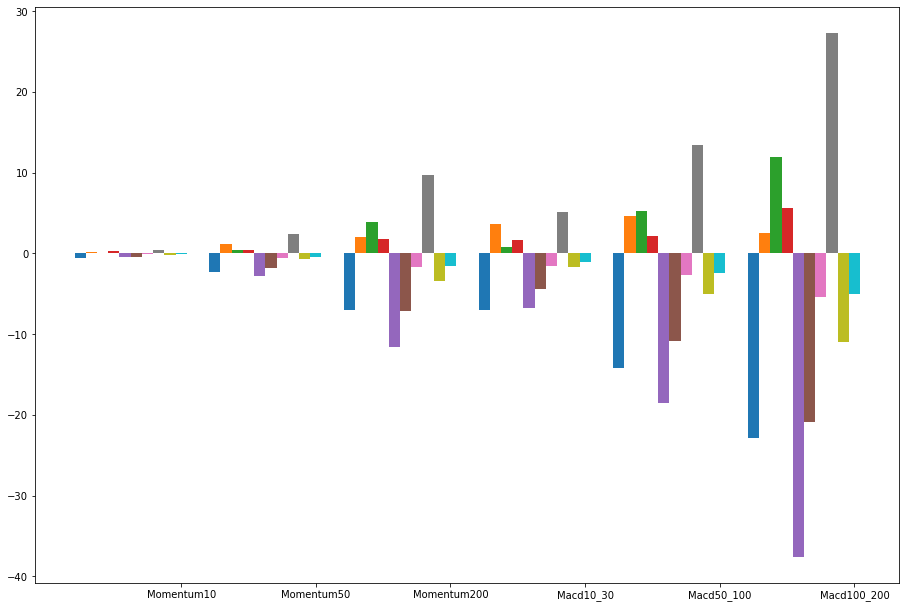

In [97]:
plot_col_mean(df,n)

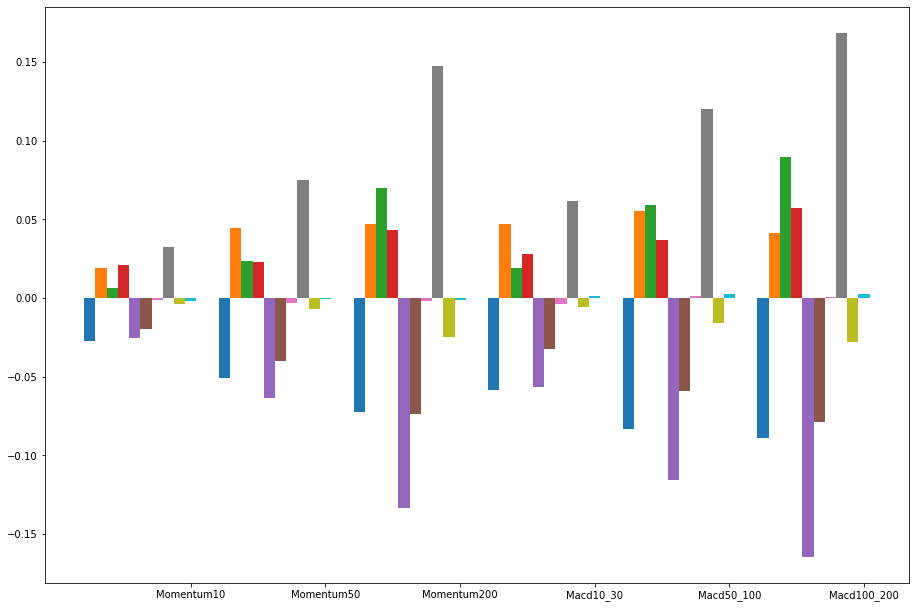

In [98]:
plot_col_mean(df_r,n)

In [72]:
w = len(df)//10
w = 2000
k = 200
df_ma = pd.DataFrame()
for col in df.columns:
    #df_ma[col] = df[col].ewm(span=k).mean()
    df_ma[col] = df[col].rolling(k).mean()
    
df_ma=df_ma.fillna(method='bfill')

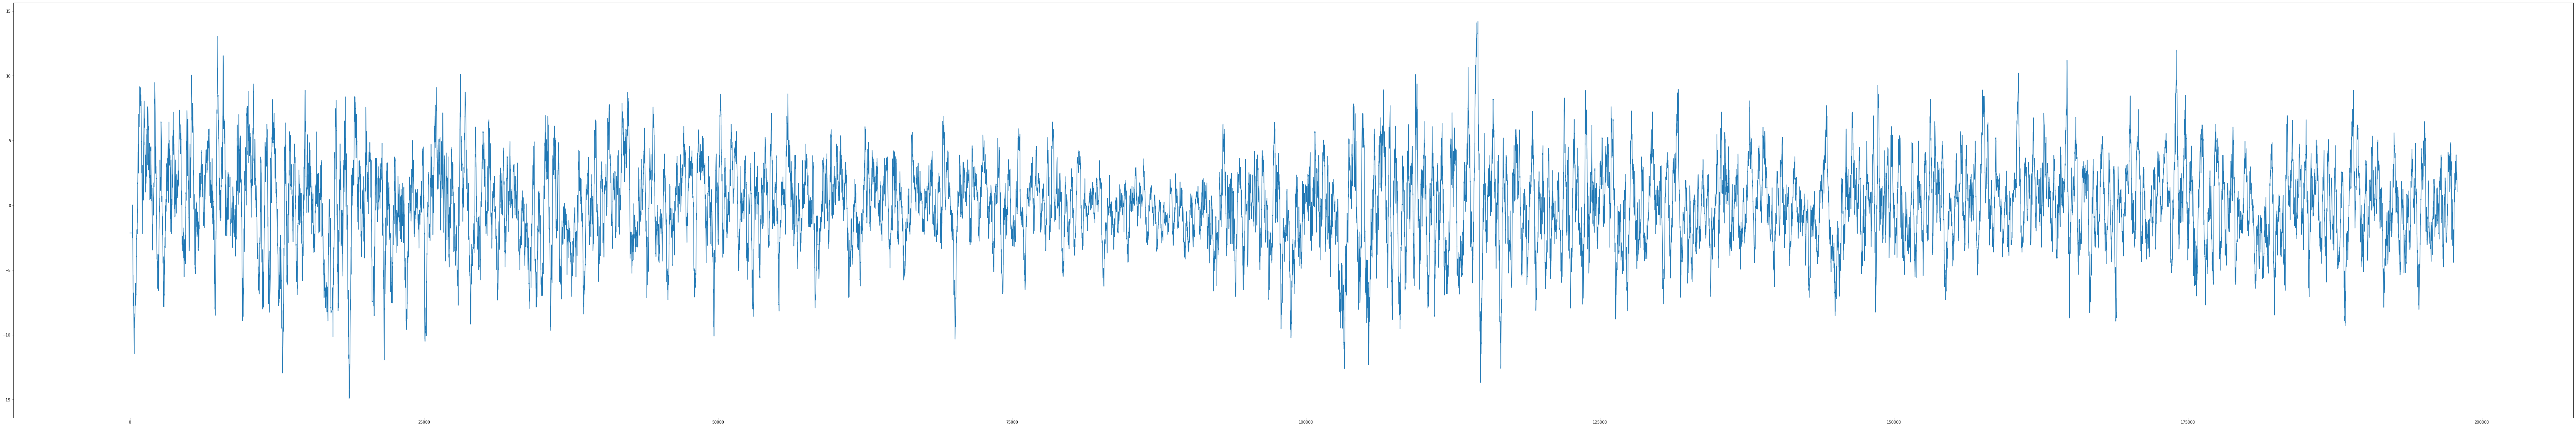

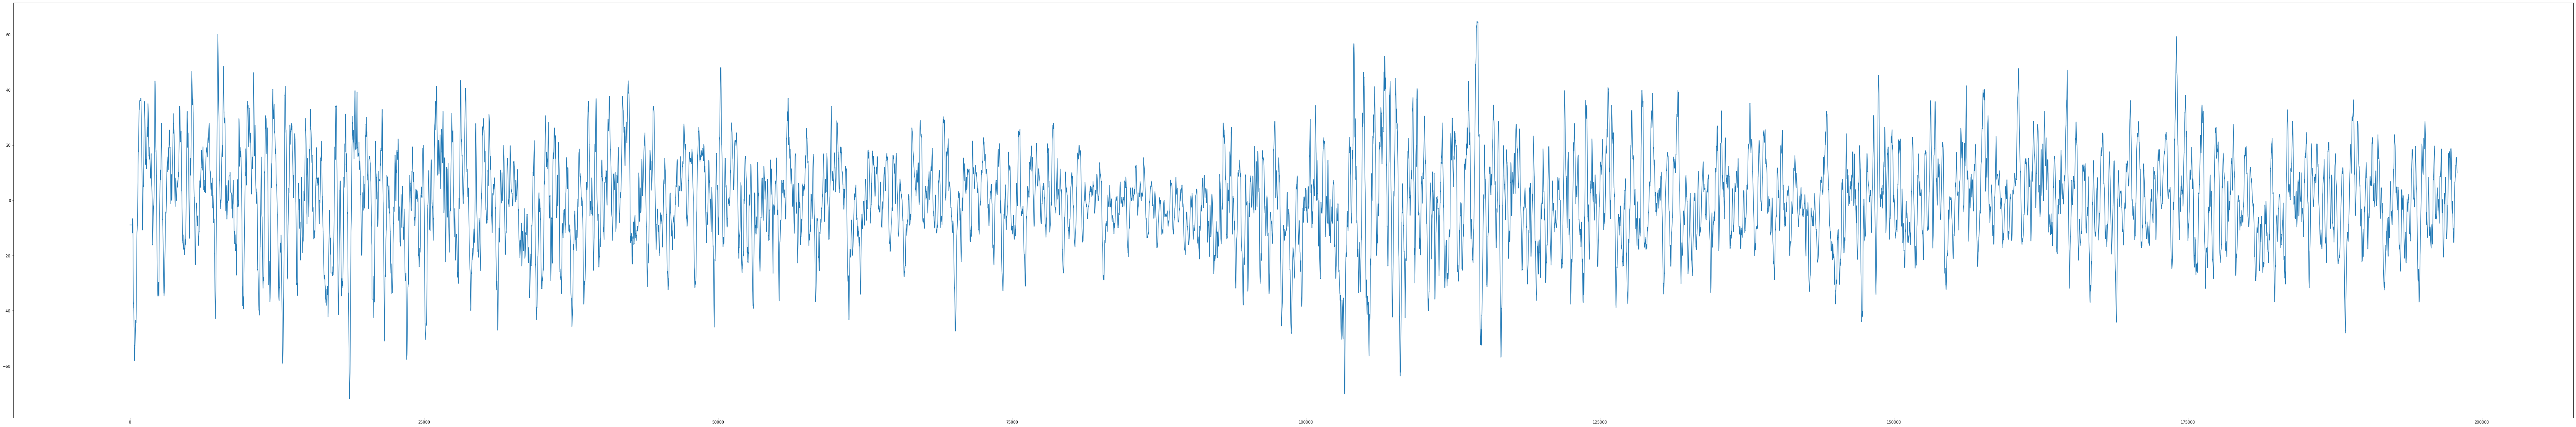

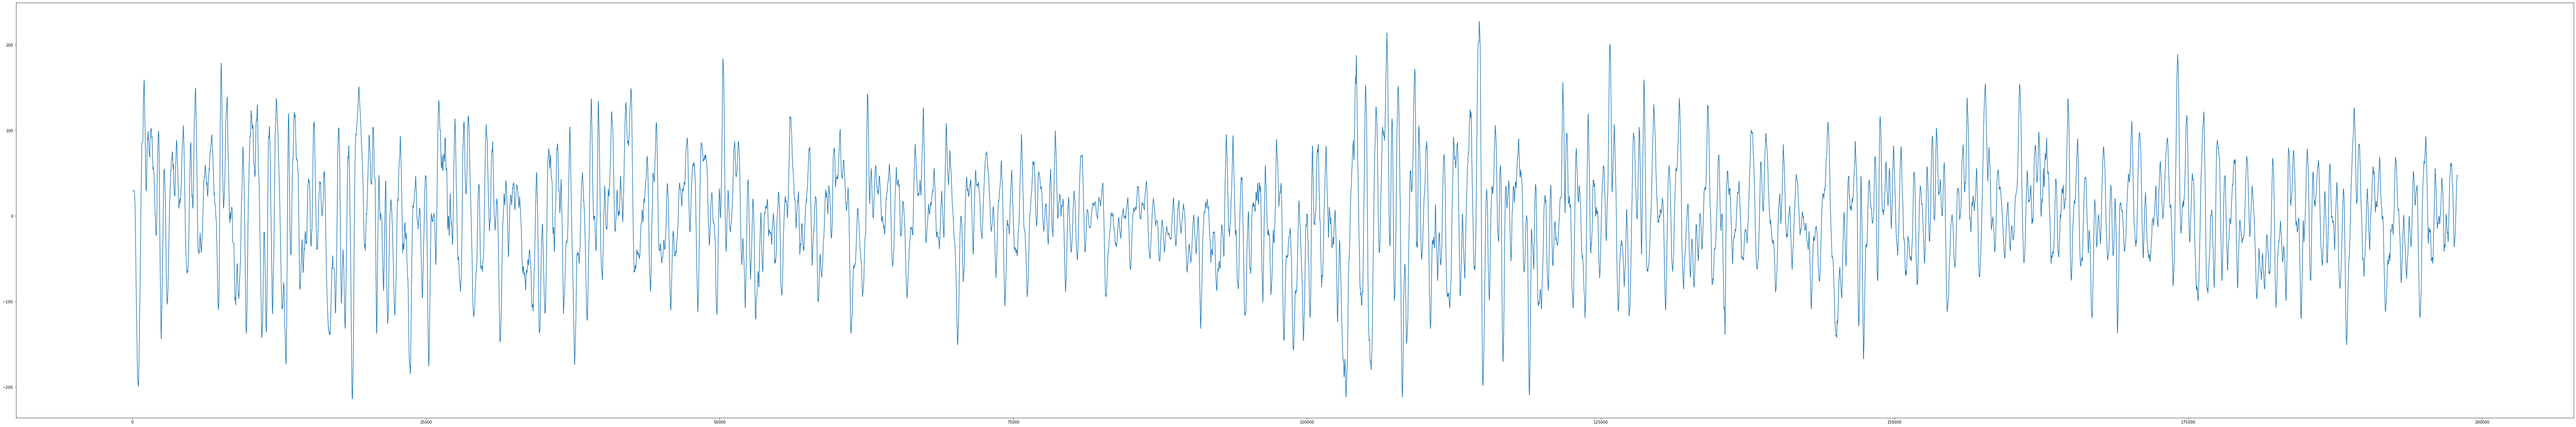

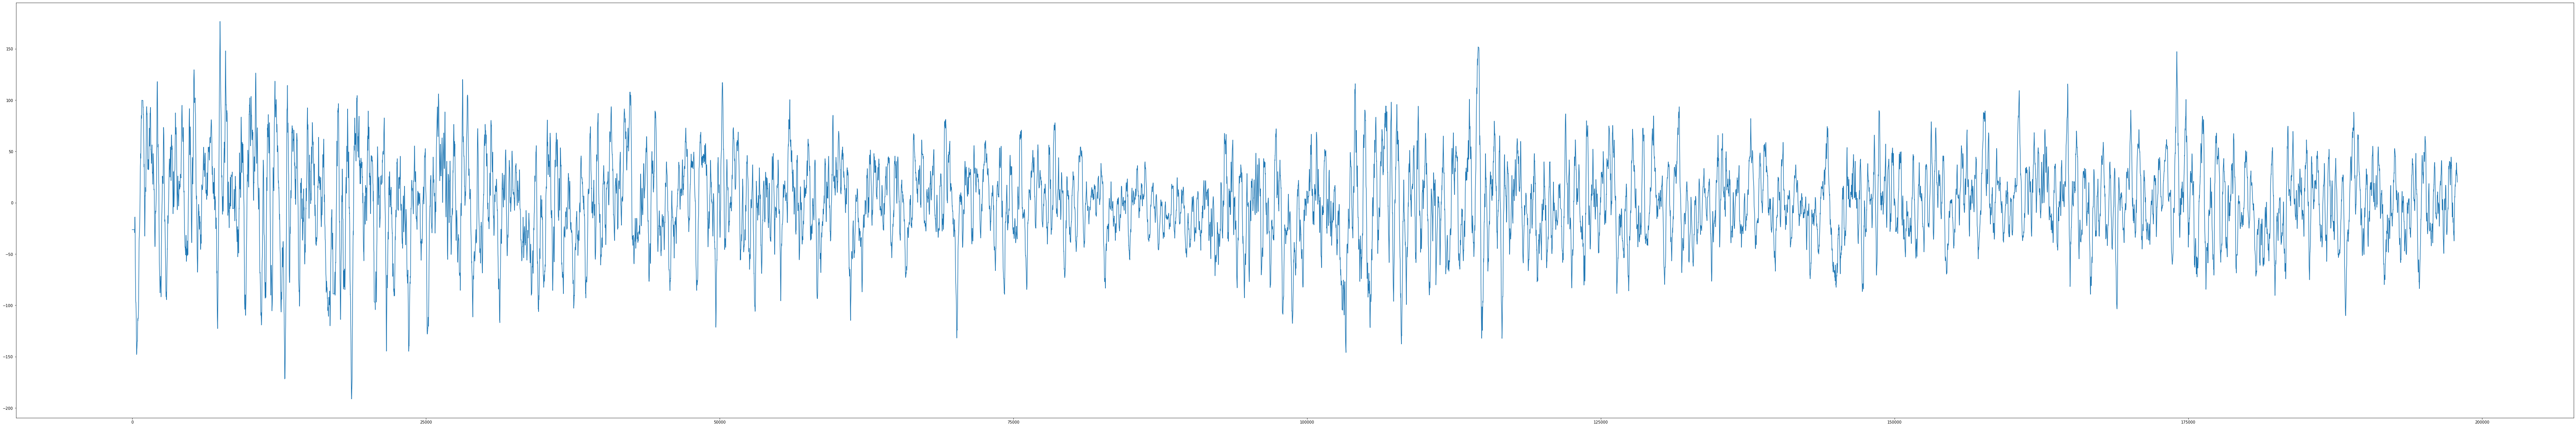

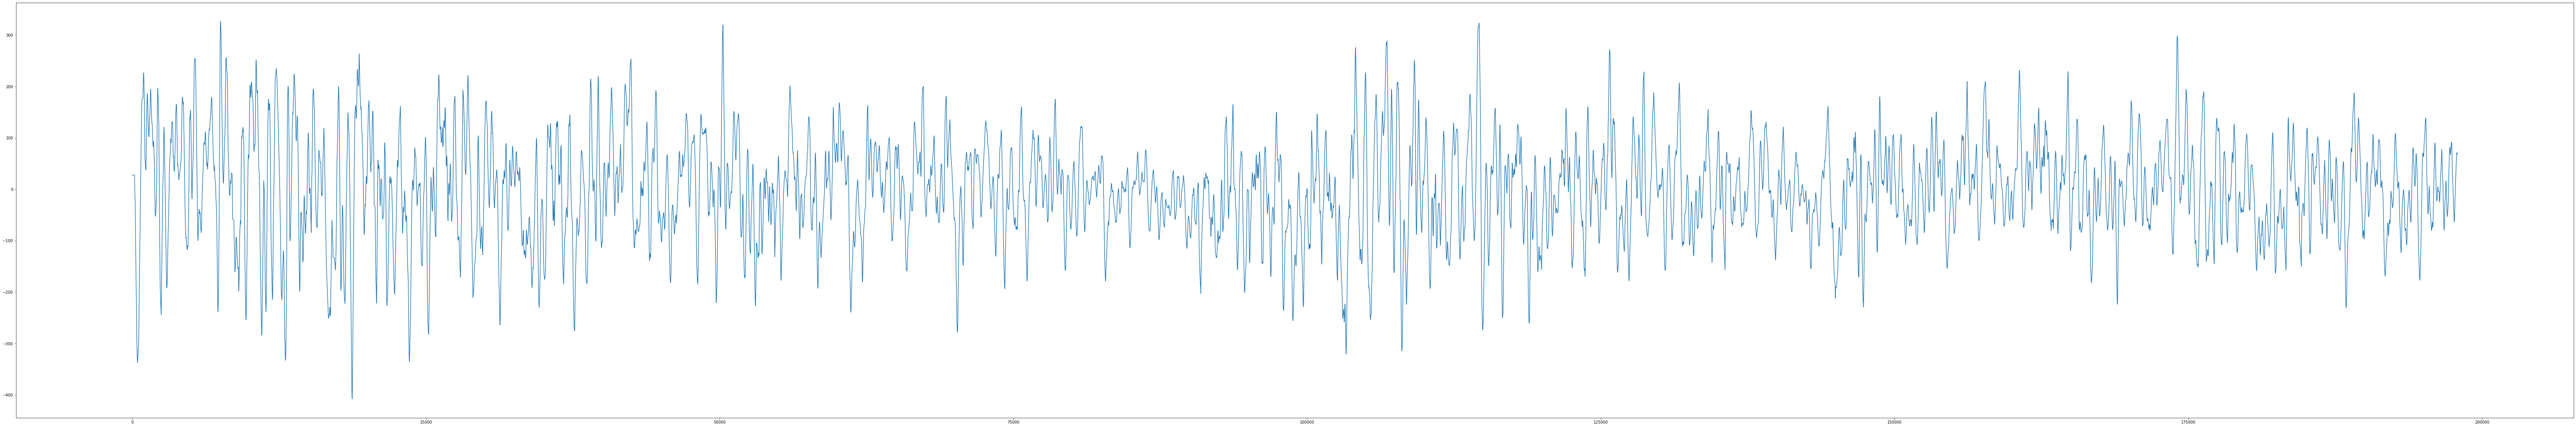

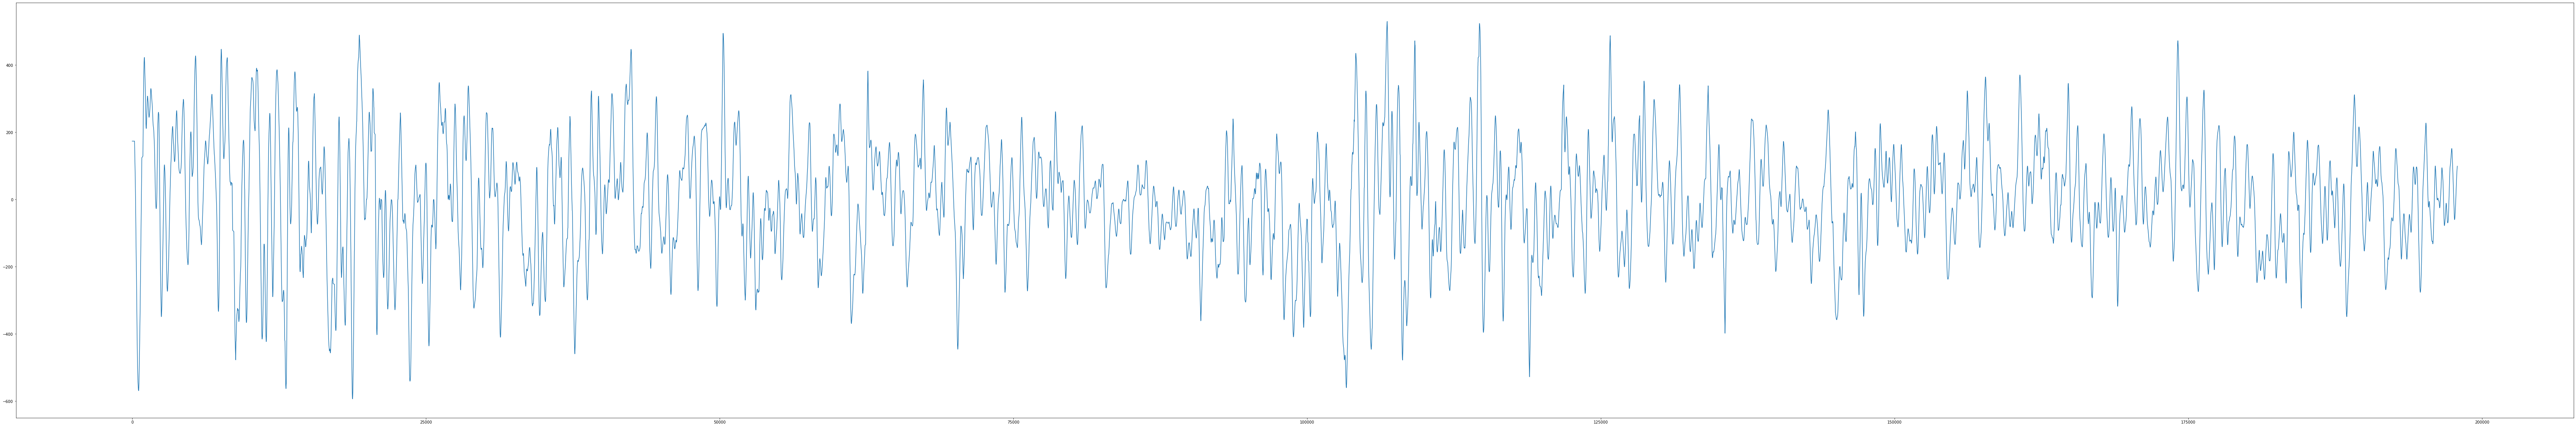

In [73]:
for col in df_ma.columns:
    f = plt.figure()
    f.set_figwidth(120)
    f.set_figheight(20)
    plt.plot(df_ma[col])

In [75]:
df

Momentum10  Momentum50  Momentum200  Macd10_30  Macd50_100  \
0         1.574532  -10.334601    82.919492 -16.084962  210.665967   
1       -25.351102  -17.288607    83.002608 -49.325683  201.355444   
2       -15.550123    2.846122    93.717171 -54.248044  195.731145   
3        -6.509735   -6.584510   103.792355 -56.675447  190.398898   
4       -22.519995  -24.236621    86.602679 -81.446269  181.327199   
...            ...         ...          ...        ...         ...   
197887   -2.095338   23.896431     4.368109  23.452569   21.028770   
197888    4.192799   19.245910    15.303222  27.080190   22.219266   
197889   12.669841   22.741188    22.215225  36.577222   24.487994   
197890    6.549589   13.982836    15.033125  42.947946   26.527917   
197891    7.685657   11.795338    13.720178  47.437585   28.447847   

        Macd100_200  
0        407.924792  
1        403.333454  
2        400.473137  
3        397.677561  
4        392.906054  
...             ...  
197887    59.470739  
197888    59.901606  
197889    60.899039  
197890    61.815586  
197891    62.702717  

[194832 rows x 6 columns]

In [76]:
nw = math.ceil(len(df)/w)
df_r = df.copy()
for col in df.columns:
    for i in range(nw):
        up = min((i+1)*w,len(df)-1)
        #print(str(i*w)+"  "+str(up))
        #df_r[col][i*w:up],m0,m1 = normalize0(df_r[col][i*w:up])
        #print(col + str(i)+"  "+str(m0)+" "+str(m1))
        #df_r[col][i*w:up] = standarize(df_r[col][i*w:up]/abs(df_ma[col][i*w]))
        df_r[col][i*w:up] = standarize(df_r[col][i*w:up])
    print(up)

KeyError: 100000

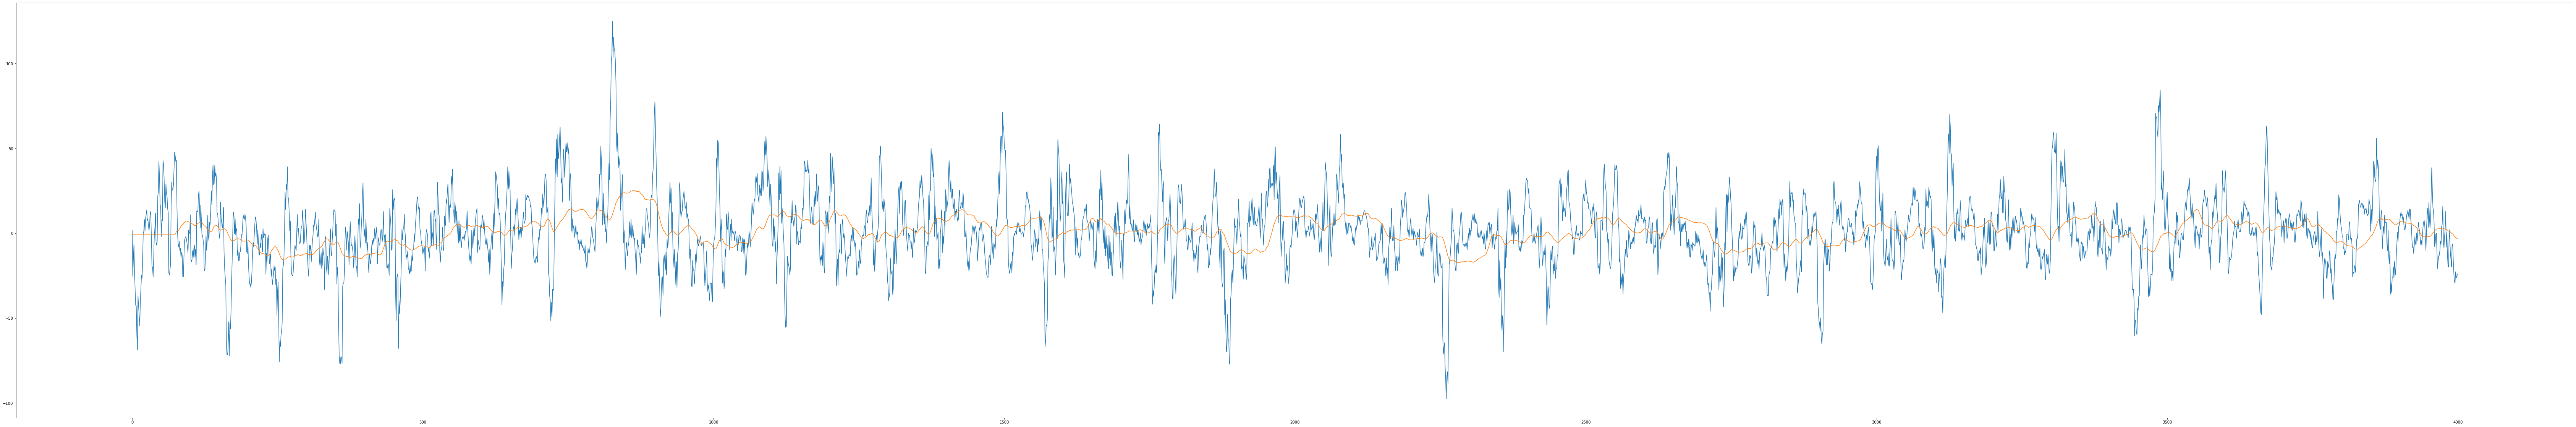

In [32]:
f = plt.figure()
f.set_figwidth(120)
f.set_figheight(20)
n = w
plt.plot(range(2*n),df["Momentum10"][0:2*n])
plt.plot(range(2*n),df_ma["Momentum10"][0:2*n])

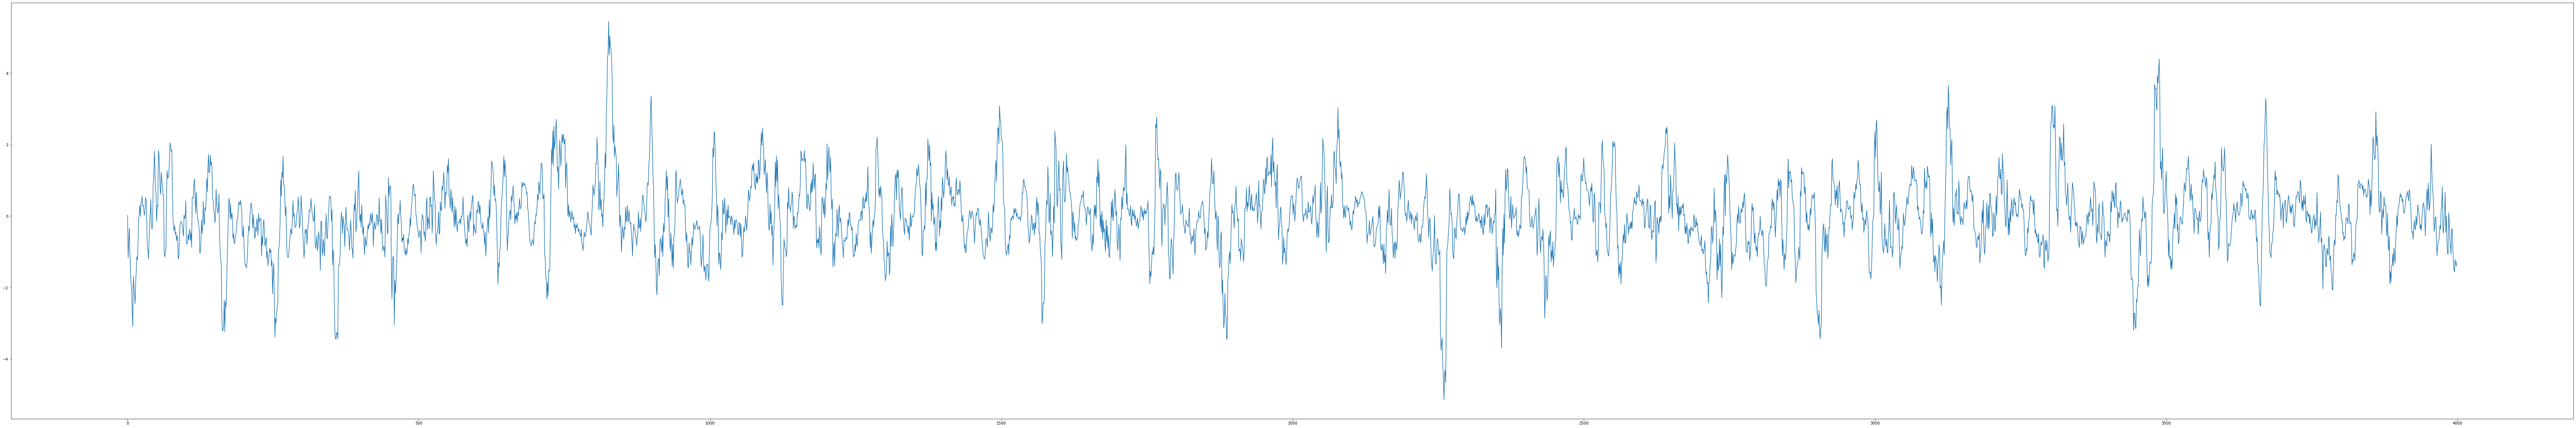

In [33]:
f = plt.figure()
f.set_figwidth(120)
f.set_figheight(20)
plt.plot(range(2*n),df_r["Momentum10"][0:2*n])

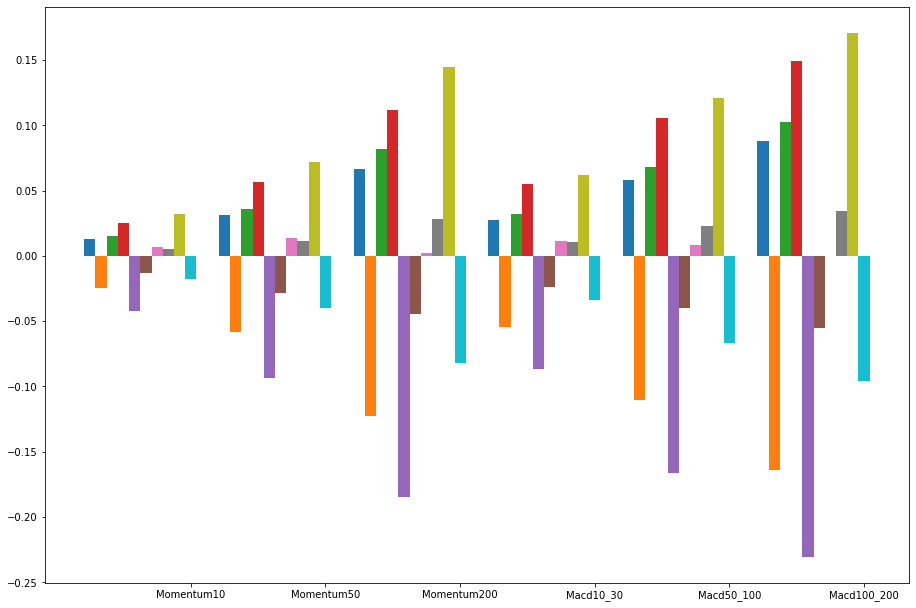

In [84]:
plot_col_mean(df_r,10)

In [111]:
for col in df.columns:
    df_raw[col] = df_r[col]
    
df_raw.to_csv(file_path,index=False,encoding='utf-16')

In [86]:

for col in df_r.columns:
    print(df_r[col].mean())

-6.767669161565144e-17
1.4271430797540288e-16
8.645410459886971e-16
2.0230551143039207e-17
-8.467770399954186e-17
2.2694487527885484e-16
